In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Colab Notebooks/Data Science/bank_amazon

%pip install seaborn
%pip install matplotlib

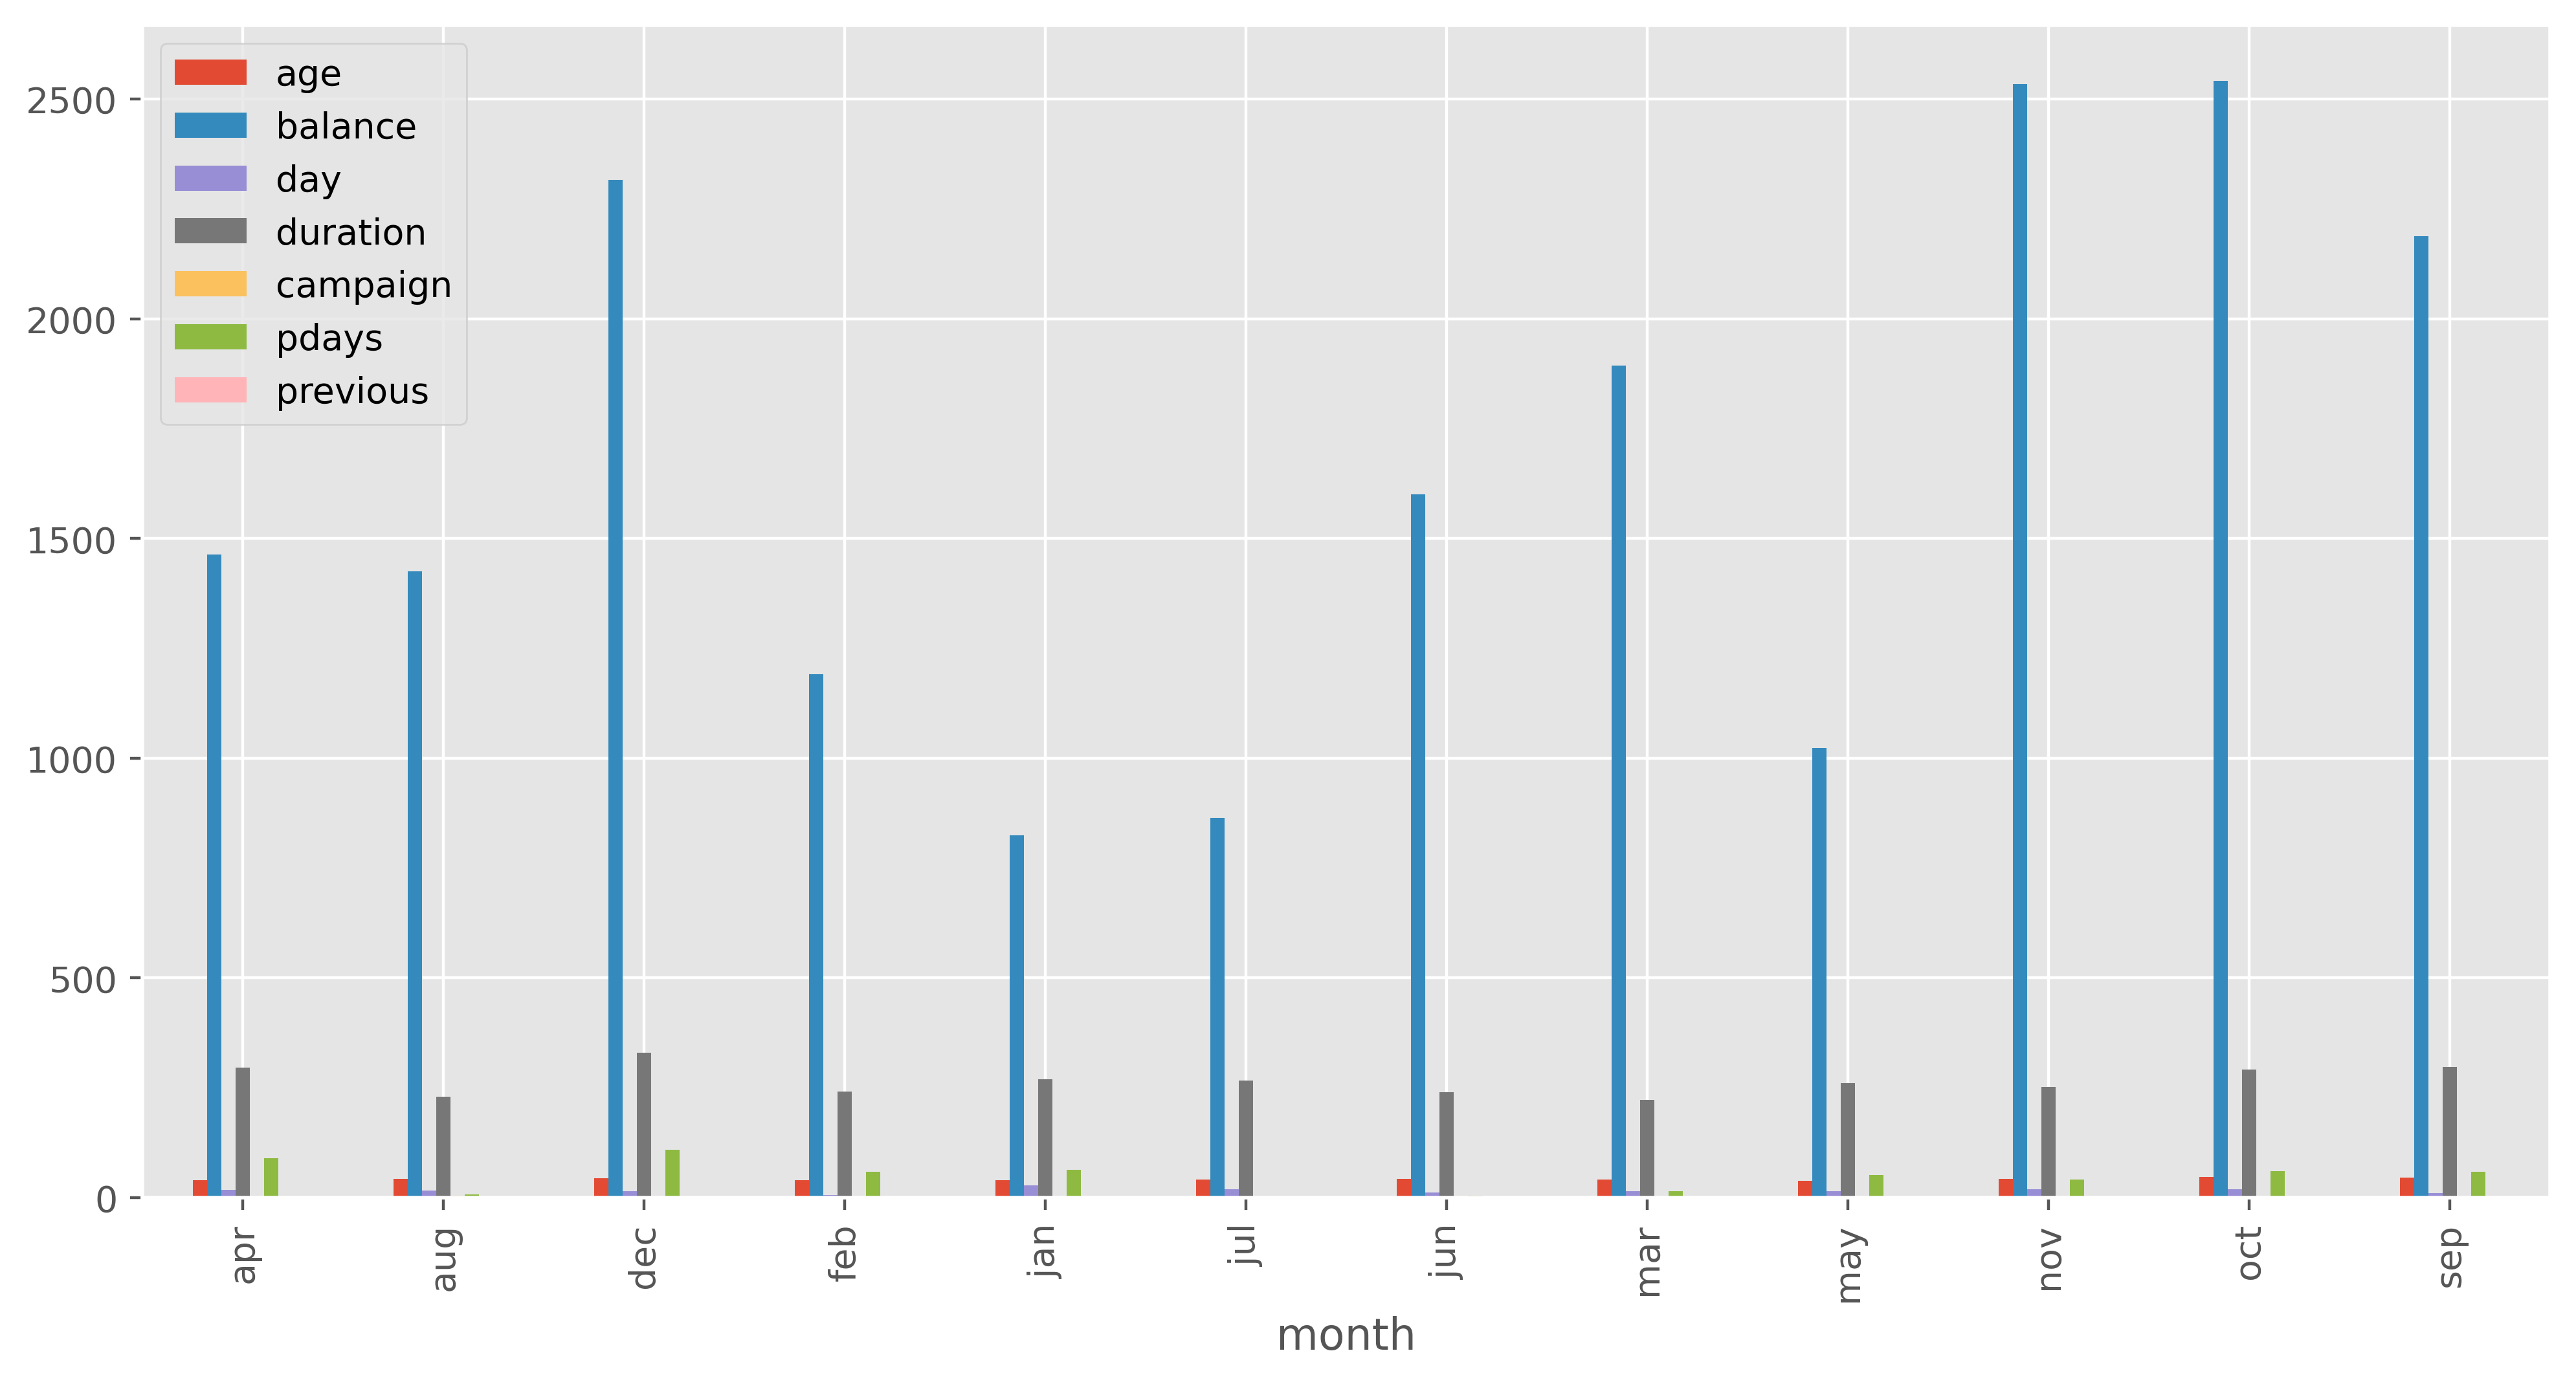

In [ ]:
#Import
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm

#seaborn context
#sns.set_context(rc={"lines.linewidth": 2.5})
plt.rcParams.update({'figure.figsize':(12,6), 'figure.dpi':400 , 'font.size':30})
color = ['black','red','green','orange','blue','limegreen','darkgreen','royalblue','navy']
plt.style.use('ggplot')

#File read
df = pd.read_csv('./BankCustomerData.csv')

#---bar plot durata media per mese di sondaggio-----------

dfmonth = df.groupby(['month']).mean().plot.bar()
months = ["jan", "feb", "mar", "apr", "may", "jun", 
          "jul", "aug", "sep", "oct", "nov", "dec"]
df['month'] = pd.Categorical(df['month'], categories=months, ordered= True)
df.sort_values(by='month')
dfmonth = df[['month','duration']]

#----------------------------------------------------------

([<matplotlib.patches.Wedge at 0x7f99174b5c10>,
 [Text(0.3234455350568339, 1.0513719540922701, 'man'),
  Text(-1.0695922303967231, -0.2568510476423317, 'boomer'),
  Text(0.10389174535612042, -1.0950828759718871, 'grampa'),
  Text(0.9500532956535649, -0.554435510603172, 'zoomer'),
  Text(1.0956736440081736, -0.09746417714140013, 'literally dead')],
 [Text(0.17642483730372757, 0.5734756113230564, '40.5%'),
  Text(-0.583413943852758, -0.14010057144127183, '26.5%'),
  Text(0.05666822473970204, -0.597317932348302, '19.0%'),
  Text(0.5182108885383081, -0.302419369419912, '11.2%'),
  Text(0.5976401694590038, -0.0531622784407637, '2.8%')])

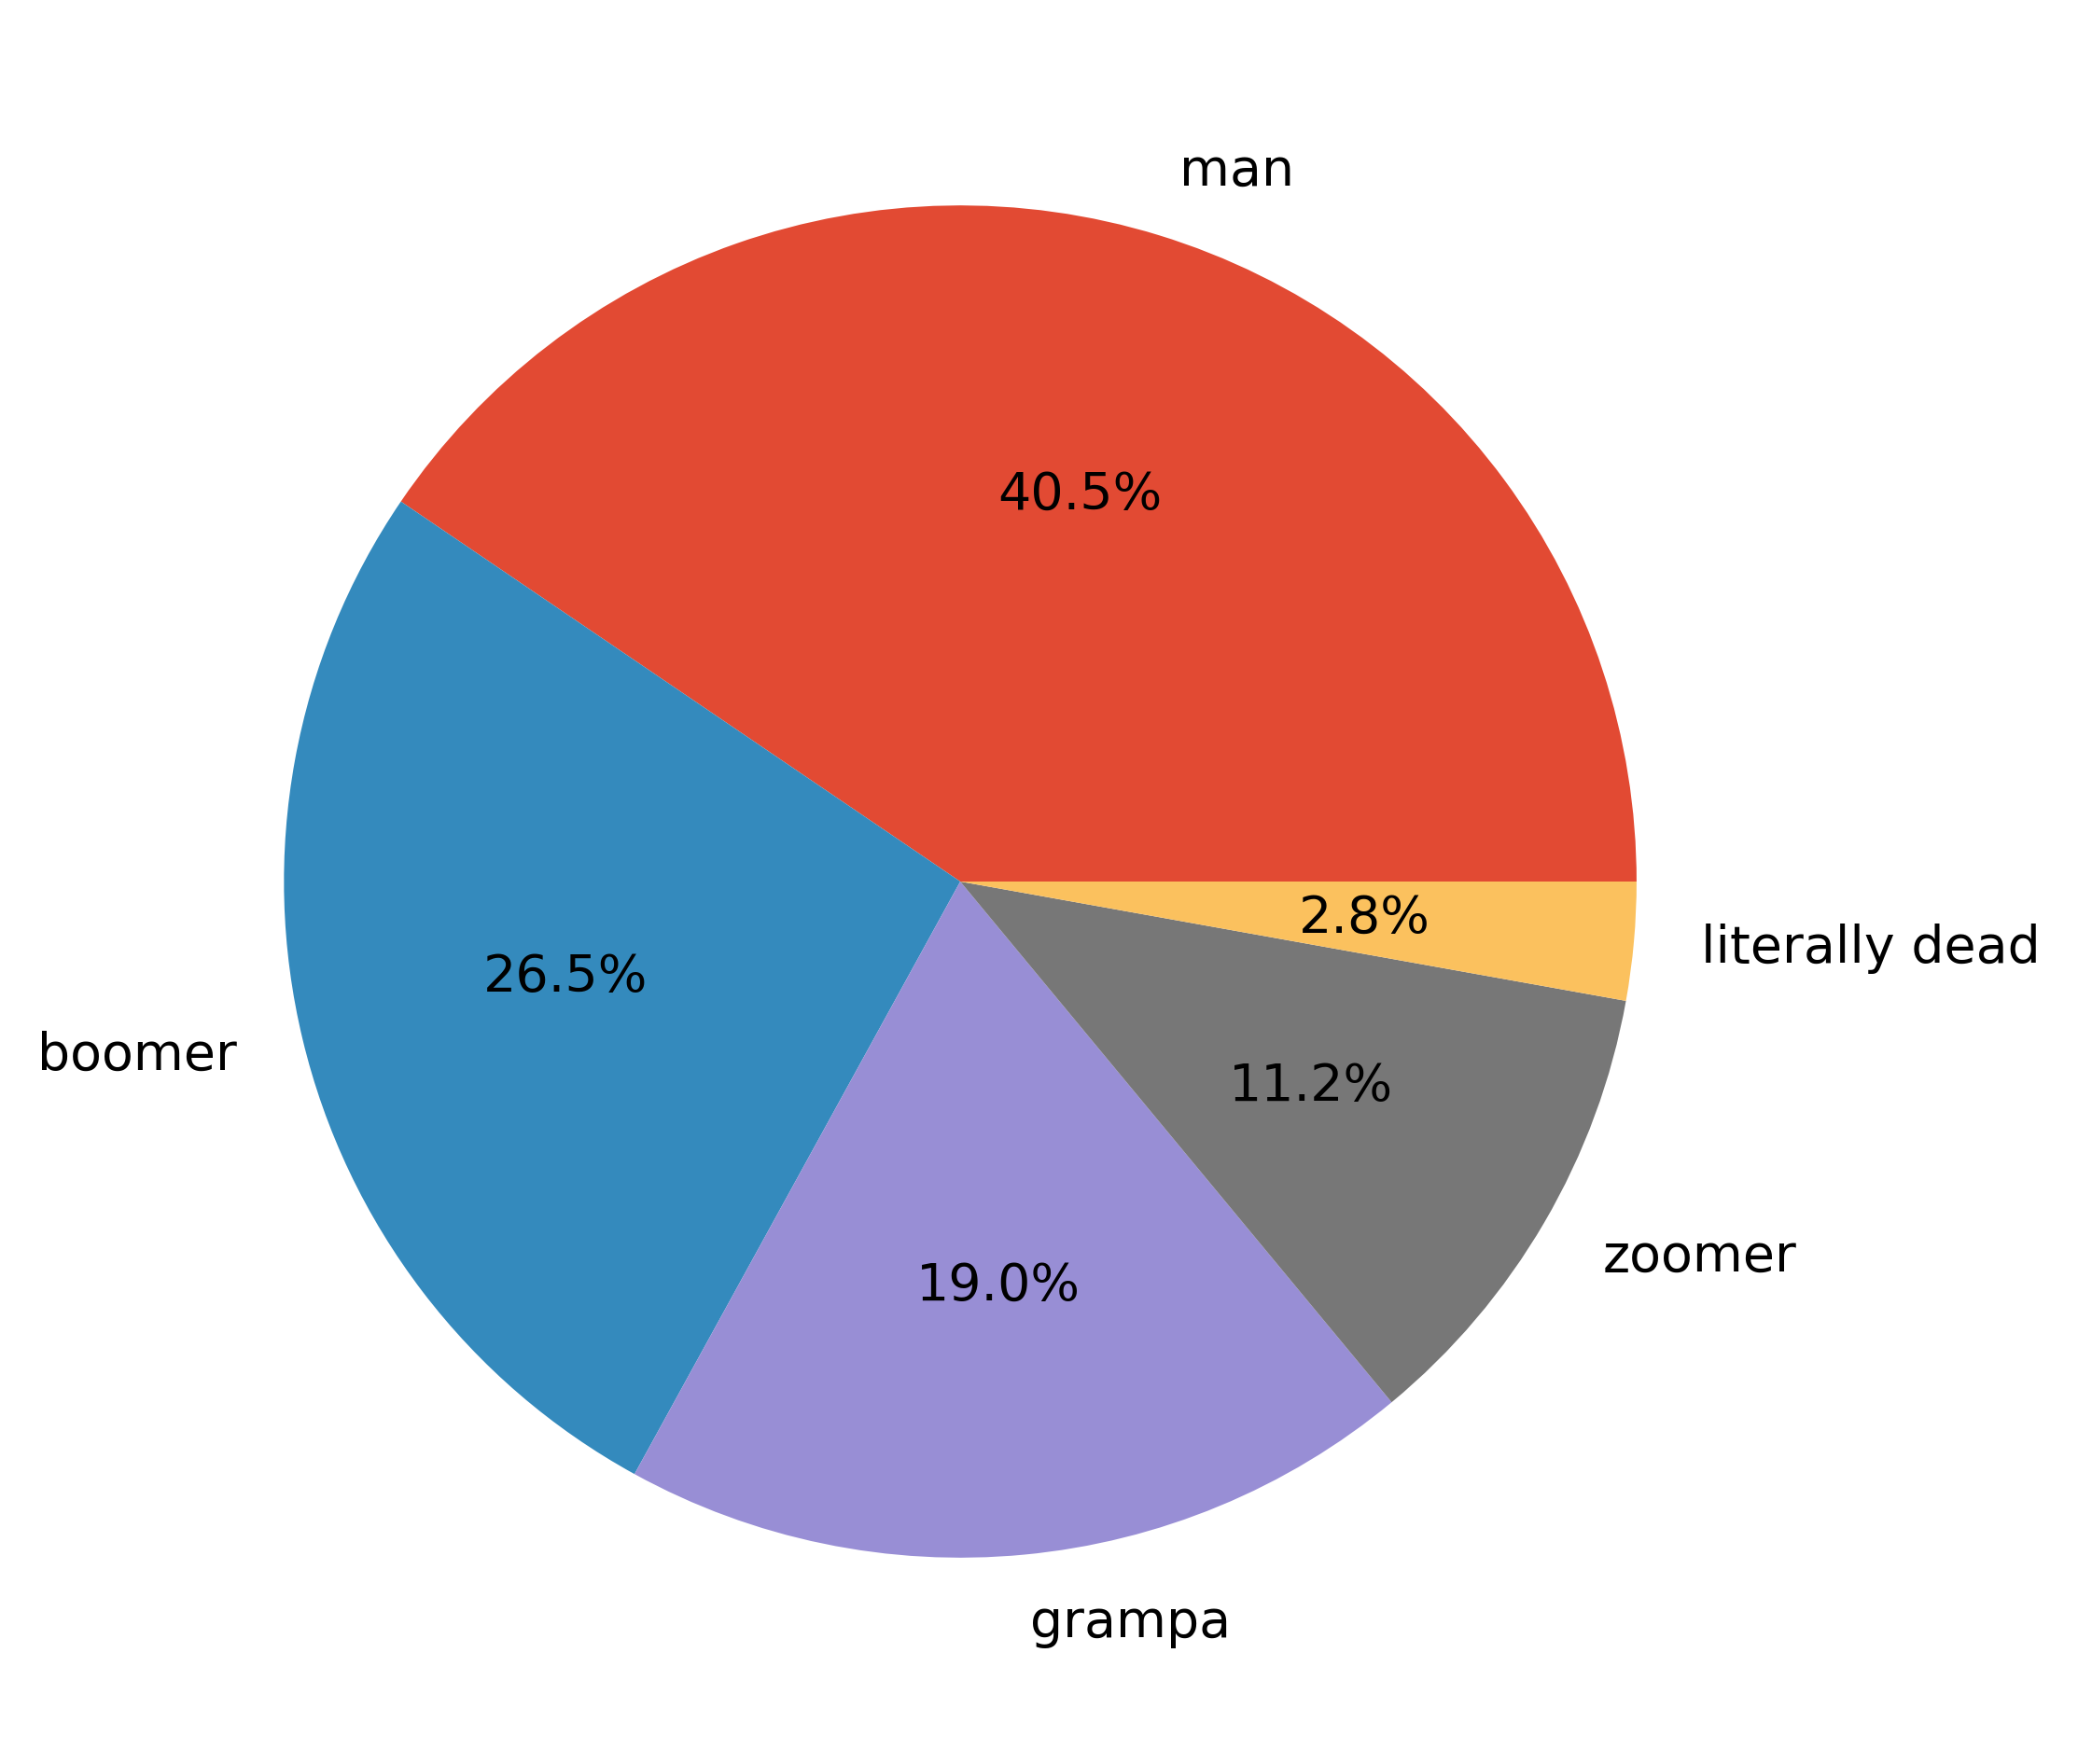

In [ ]:
#---torta per range di età-------------------------------

dfage = df
bins= [18,30,40,50,60,70,100]
labels = ['Ventenni','Trentenni','Quarantenni','Cinquantenni','Sessantenni','Ultra-Settantenni'] 
dfage['AgeGroup'] = pd. cut(dfage['age'], bins=bins, labels=labels, right=False)
dfage = pd.DataFrame(dfage['AgeGroup'].value_counts().reset_index())
plt.pie(data=dfage,x='AgeGroup',labels='index', autopct='%.1f%%')

#-----------------------------------------------------------


([<matplotlib.patches.Wedge at 0x7f9917412790>,
 [Text(-0.3617792397286799, 1.038804977703389, 'married'),
  Text(-0.03375082759360541, -1.0994820970060162, 'single'),
  Text(1.0272155511421188, -0.39348216159286475, 'divorced')],
 [Text(-0.19733413076109813, 0.5666208969291212, '60.7%'),
  Text(-0.018409542323784767, -0.5997175074578269, '27.7%'),
  Text(0.5602993915320648, -0.21462663359610804, '11.6%')])

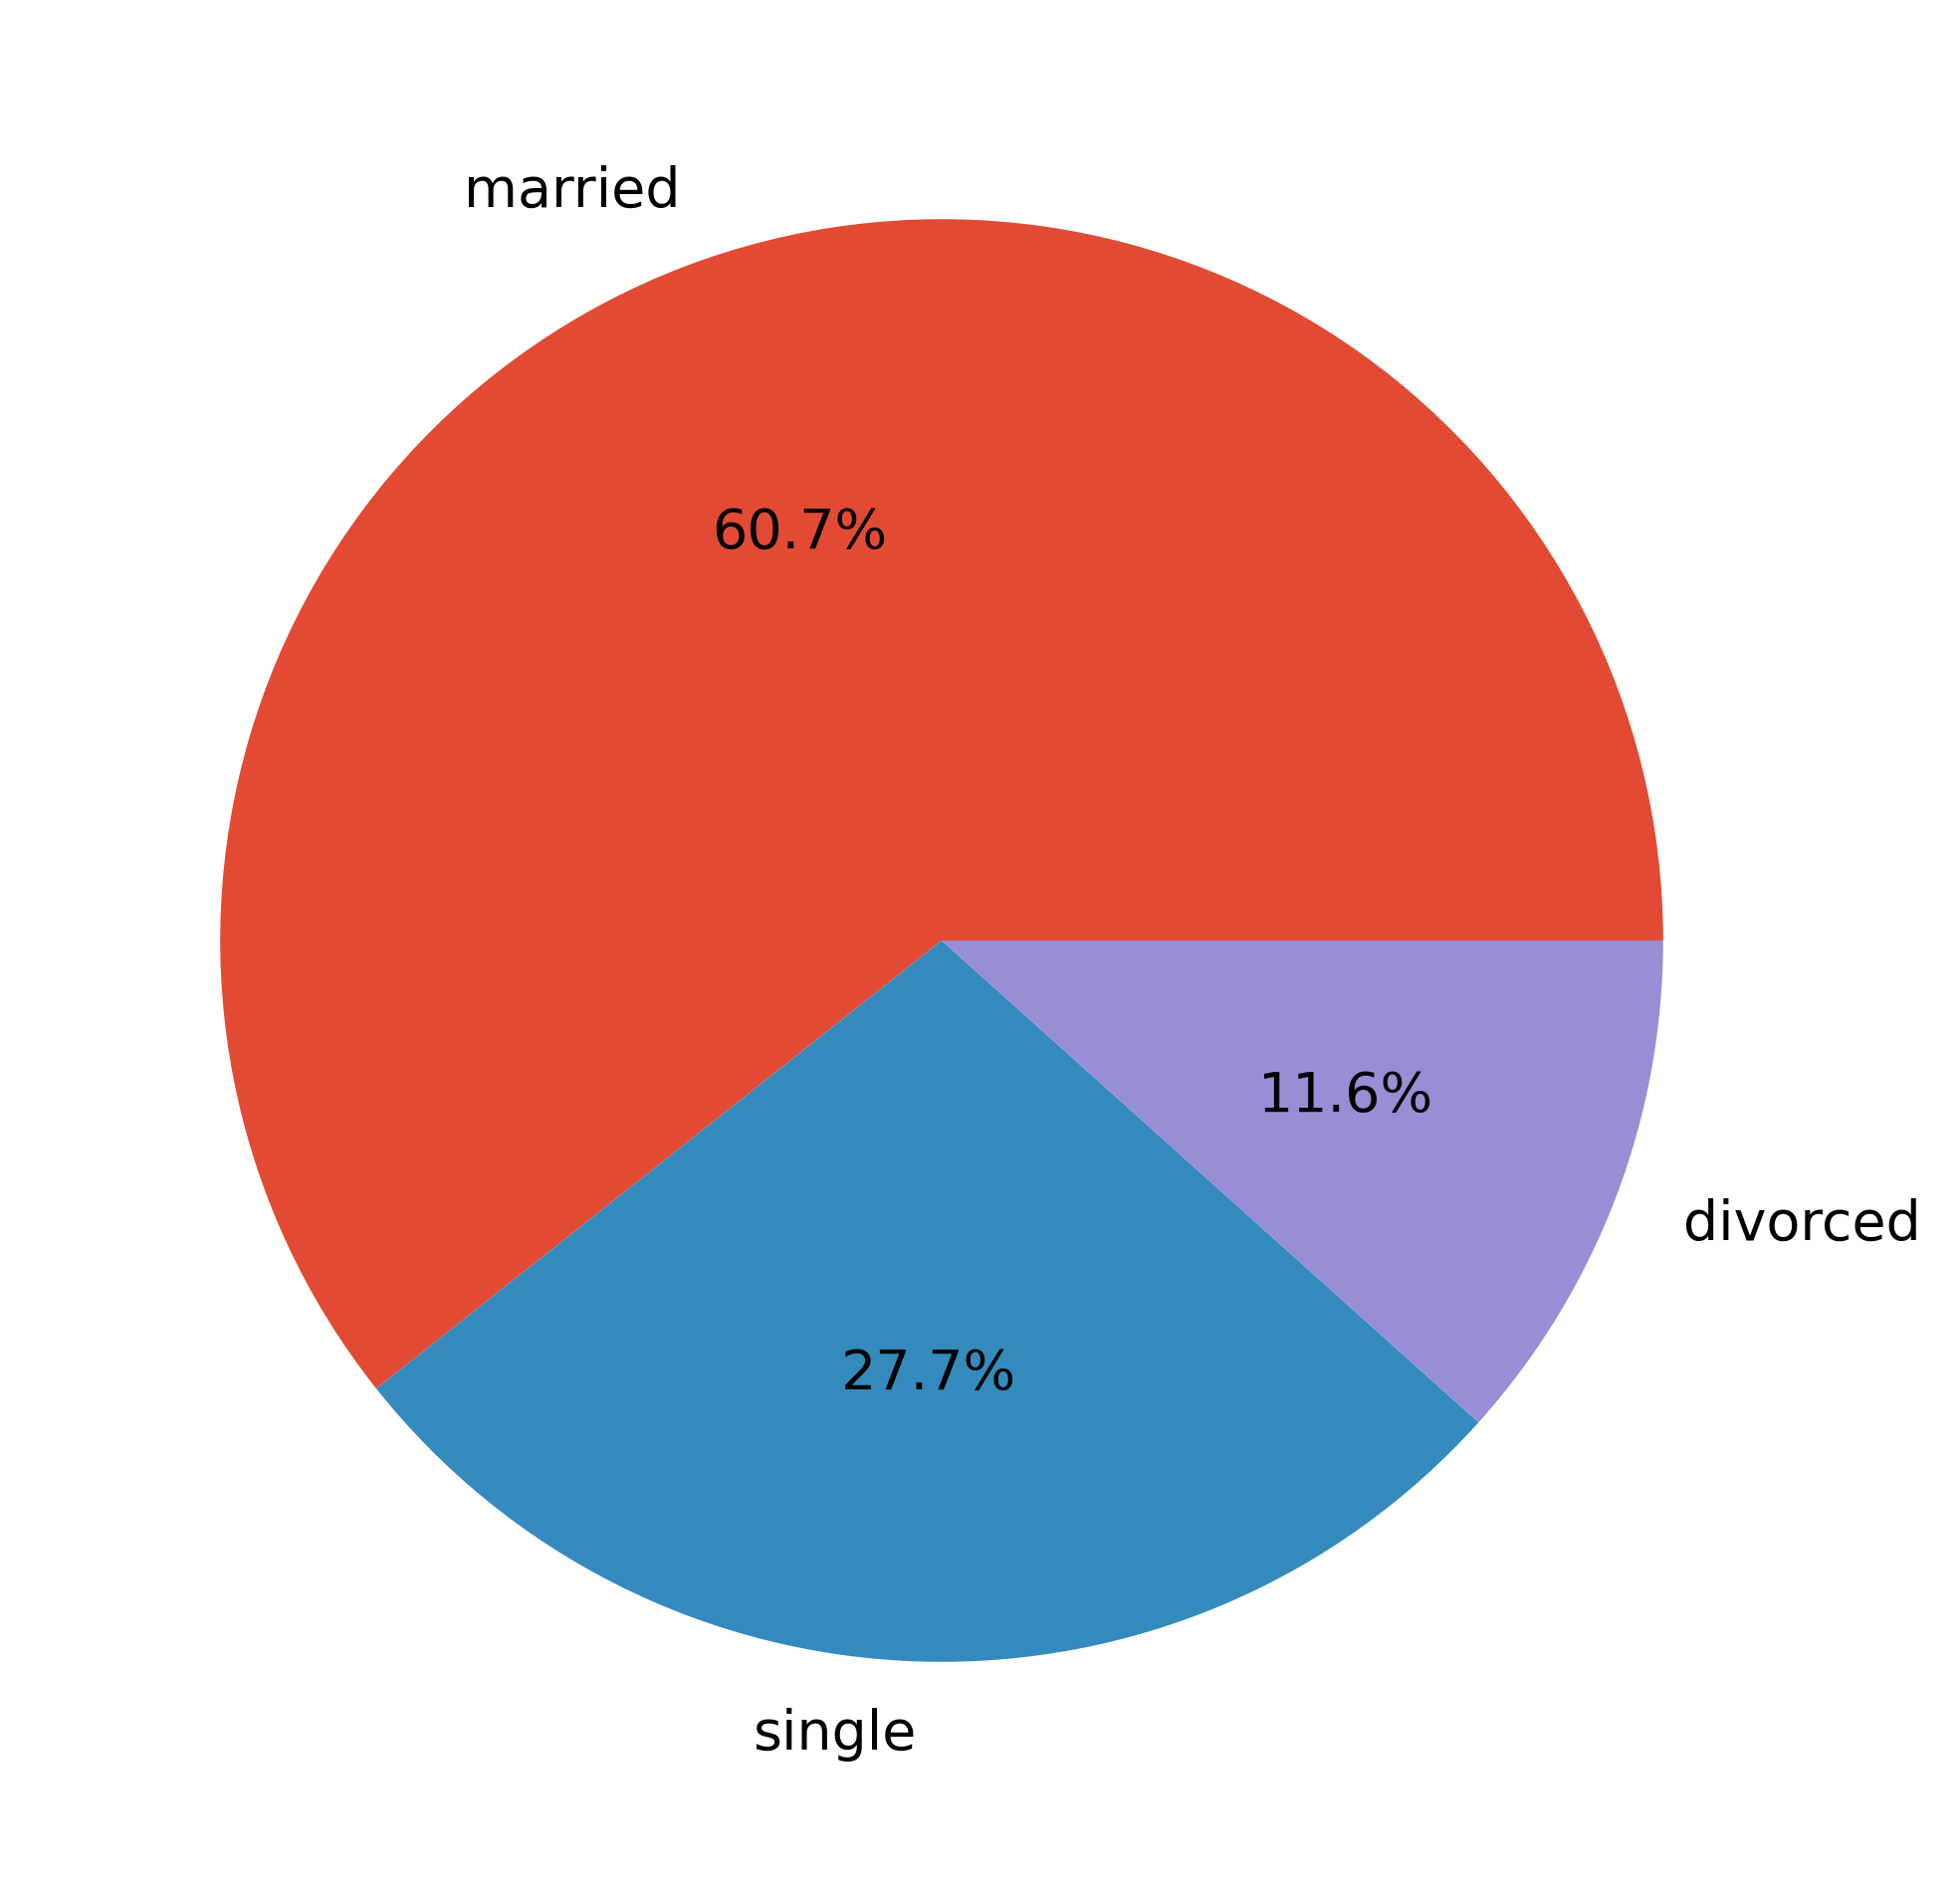

In [ ]:
#---torta per stato maritale--------------------------------

df1 = pd.DataFrame(df['marital'].value_counts().reset_index())
plt.pie(data=df1,x='marital',labels='index', autopct='%.1f%%')

#-----------------------------------------------------------

<ipython-input-12-3206ffa059f1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfbalance['AgeGroup'] = pd. cut(dfbalance['age'], bins=bins, labels=labels, right=False)
<ipython-input-12-3206ffa059f1>:23: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.imshow(np.flip(grad), extent=[x,x+w,y,y+h], aspect='auto', zorder=1,interpolation='nearest', cmap=cmap, norm=norm)


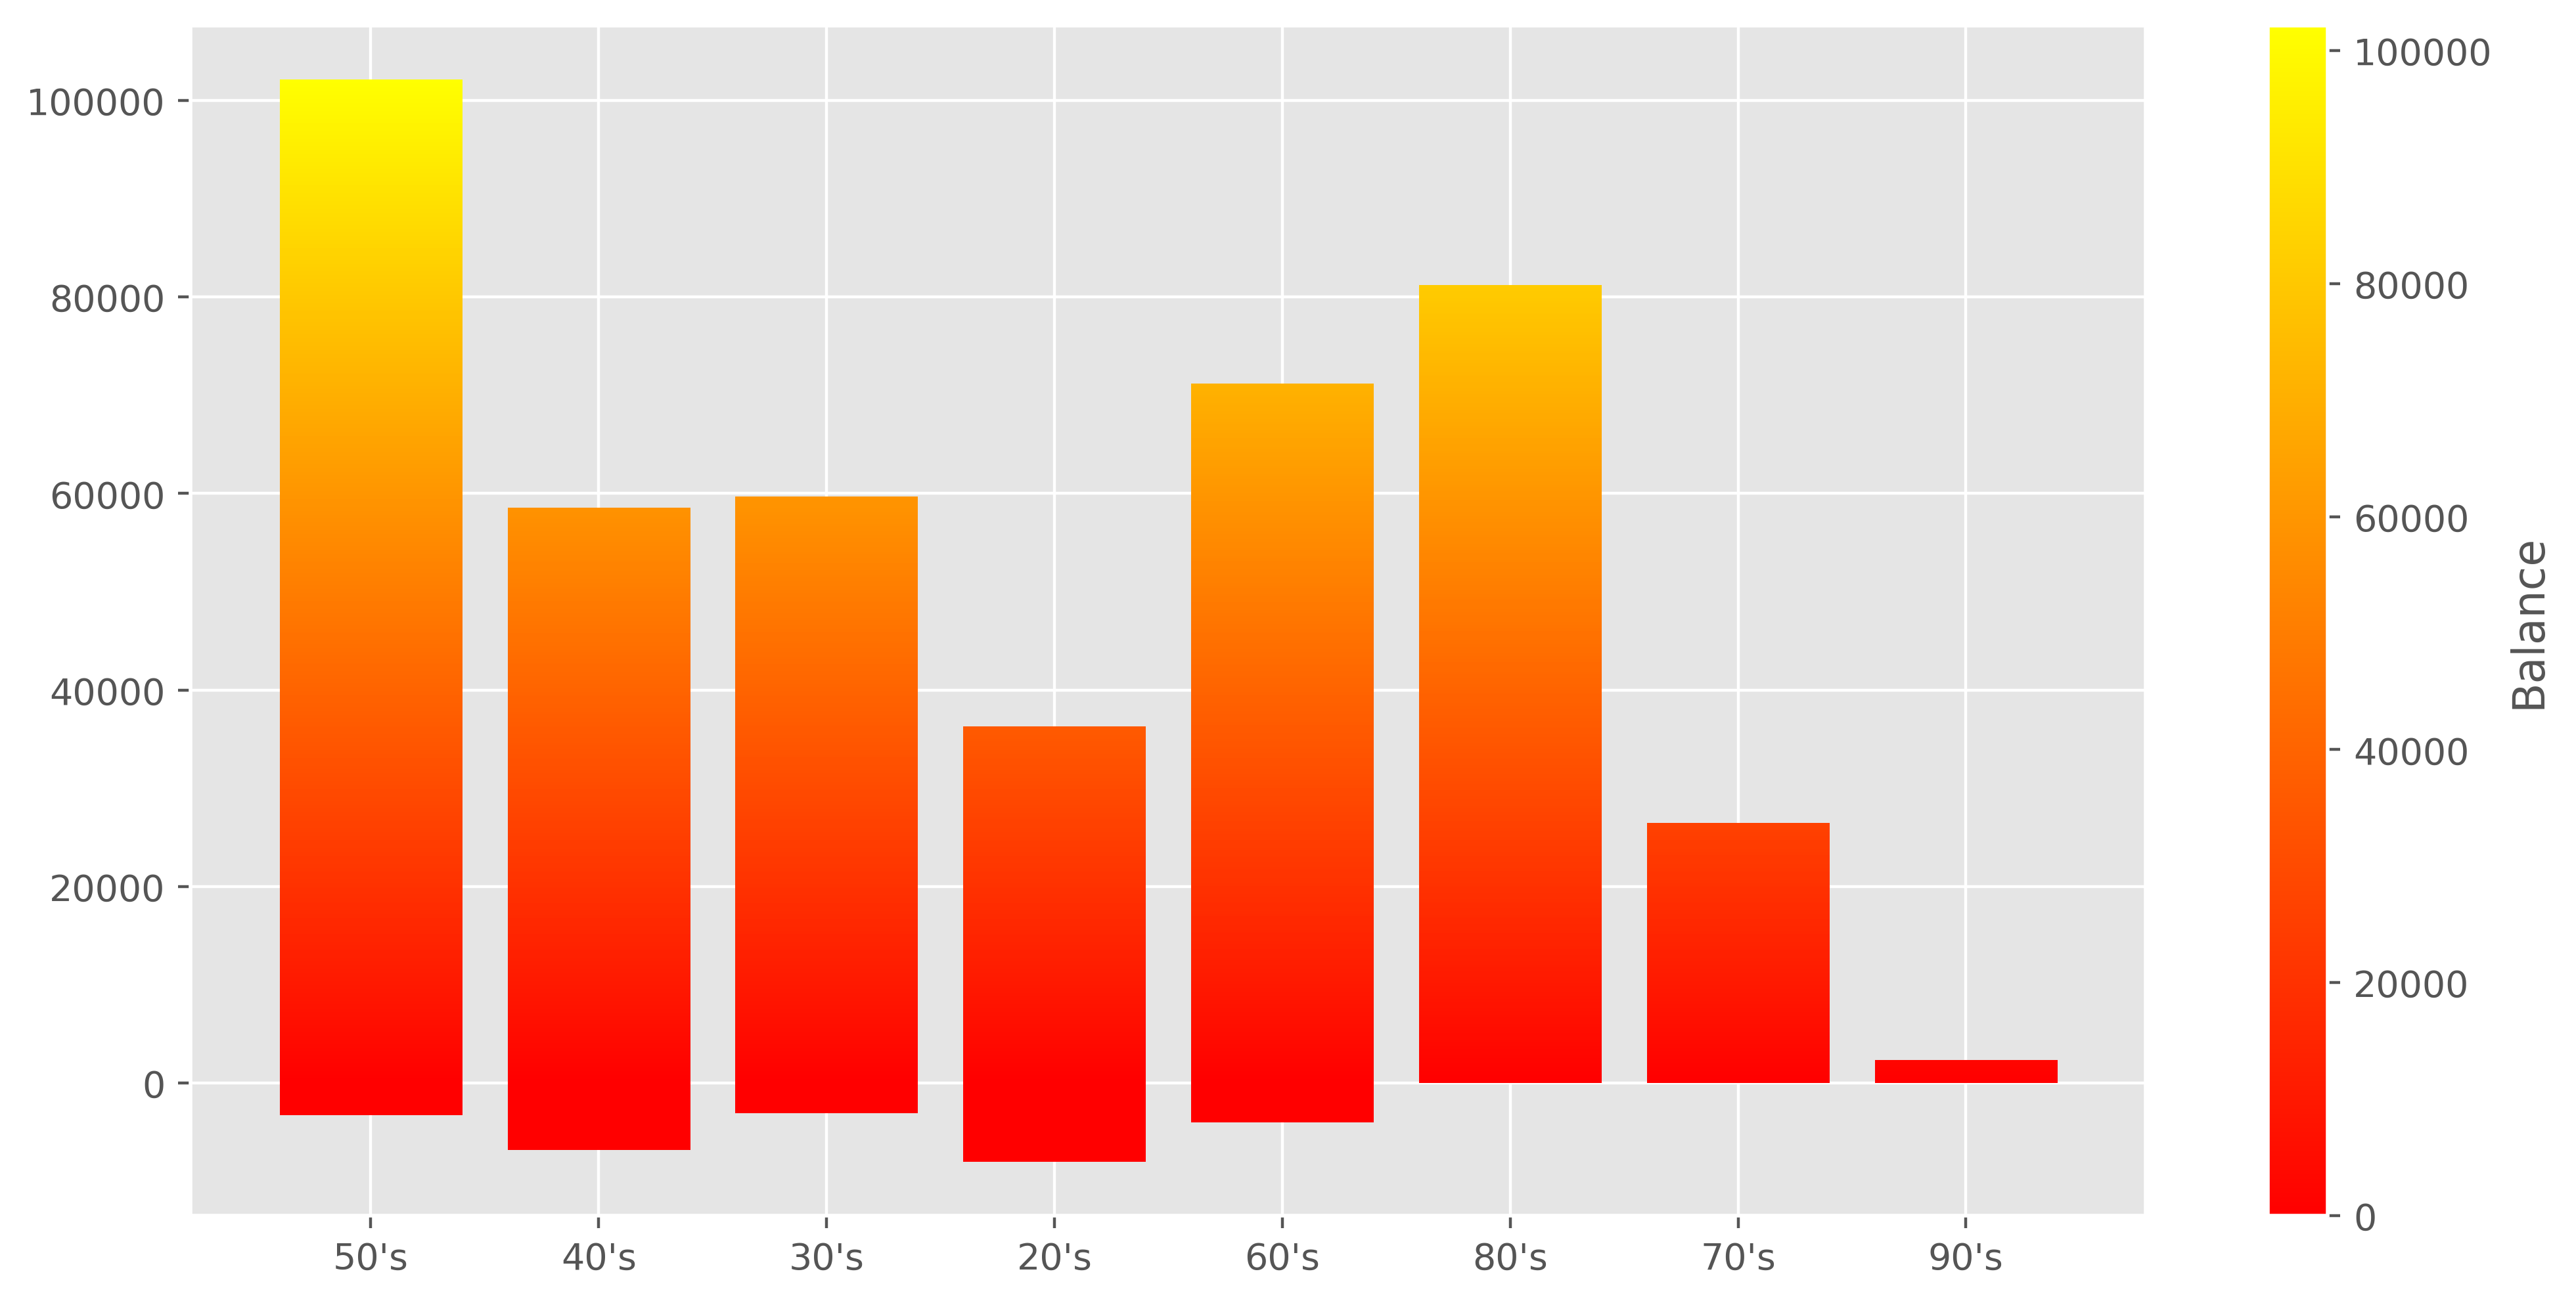

In [ ]:
#--bar plot COLORI del credito medio per range di età-----

dfbalance = df[['balance','age']]
bins= [18,30,40,50,60,70,80,90,100]
labels = ["20's","30's","40's","50's","60's","70's","80's","90's"] 
dfbalance['AgeGroup'] = pd. cut(dfbalance['age'], bins=bins, labels=labels, right=False)
#dfbalance = dfbalance[['balance','AgeGroup']].groupby(['AgeGroup']).mean().plot.bar()
norm = Normalize(vmin=0, vmax=dfbalance['balance'].max())
cmap = cm.autumn
mappable = cm.ScalarMappable(norm=norm, cmap=cmap)
mappable.set_array(dfbalance['balance'])
fig, ax = plt.subplots()
bars = ax.bar(dfbalance['AgeGroup'], dfbalance['balance'])

ax = bars[0].axes
lim = ax.get_xlim()+ax.get_ylim()
for bar, val in zip(bars, dfbalance['balance']):
    grad = np.atleast_2d(np.linspace(0,val,256)).T
    bar.set_zorder(1)
    bar.set_facecolor('none')
    x, y = bar.get_xy()
    w, h = bar.get_width(), bar.get_height()
    ax.imshow(np.flip(grad), extent=[x,x+w,y,y+h], aspect='auto', zorder=1,interpolation='nearest', cmap=cmap, norm=norm)
ax.axis(lim)
cb = fig.colorbar(mappable)
cb.set_label("Balance")

#-----------------------------------------------------------

<ipython-input-13-1d89b39e0d75>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfbalance['AgeGroup'] = pd. cut(dfbalance['age'], bins=bins, labels=labels, right=False)


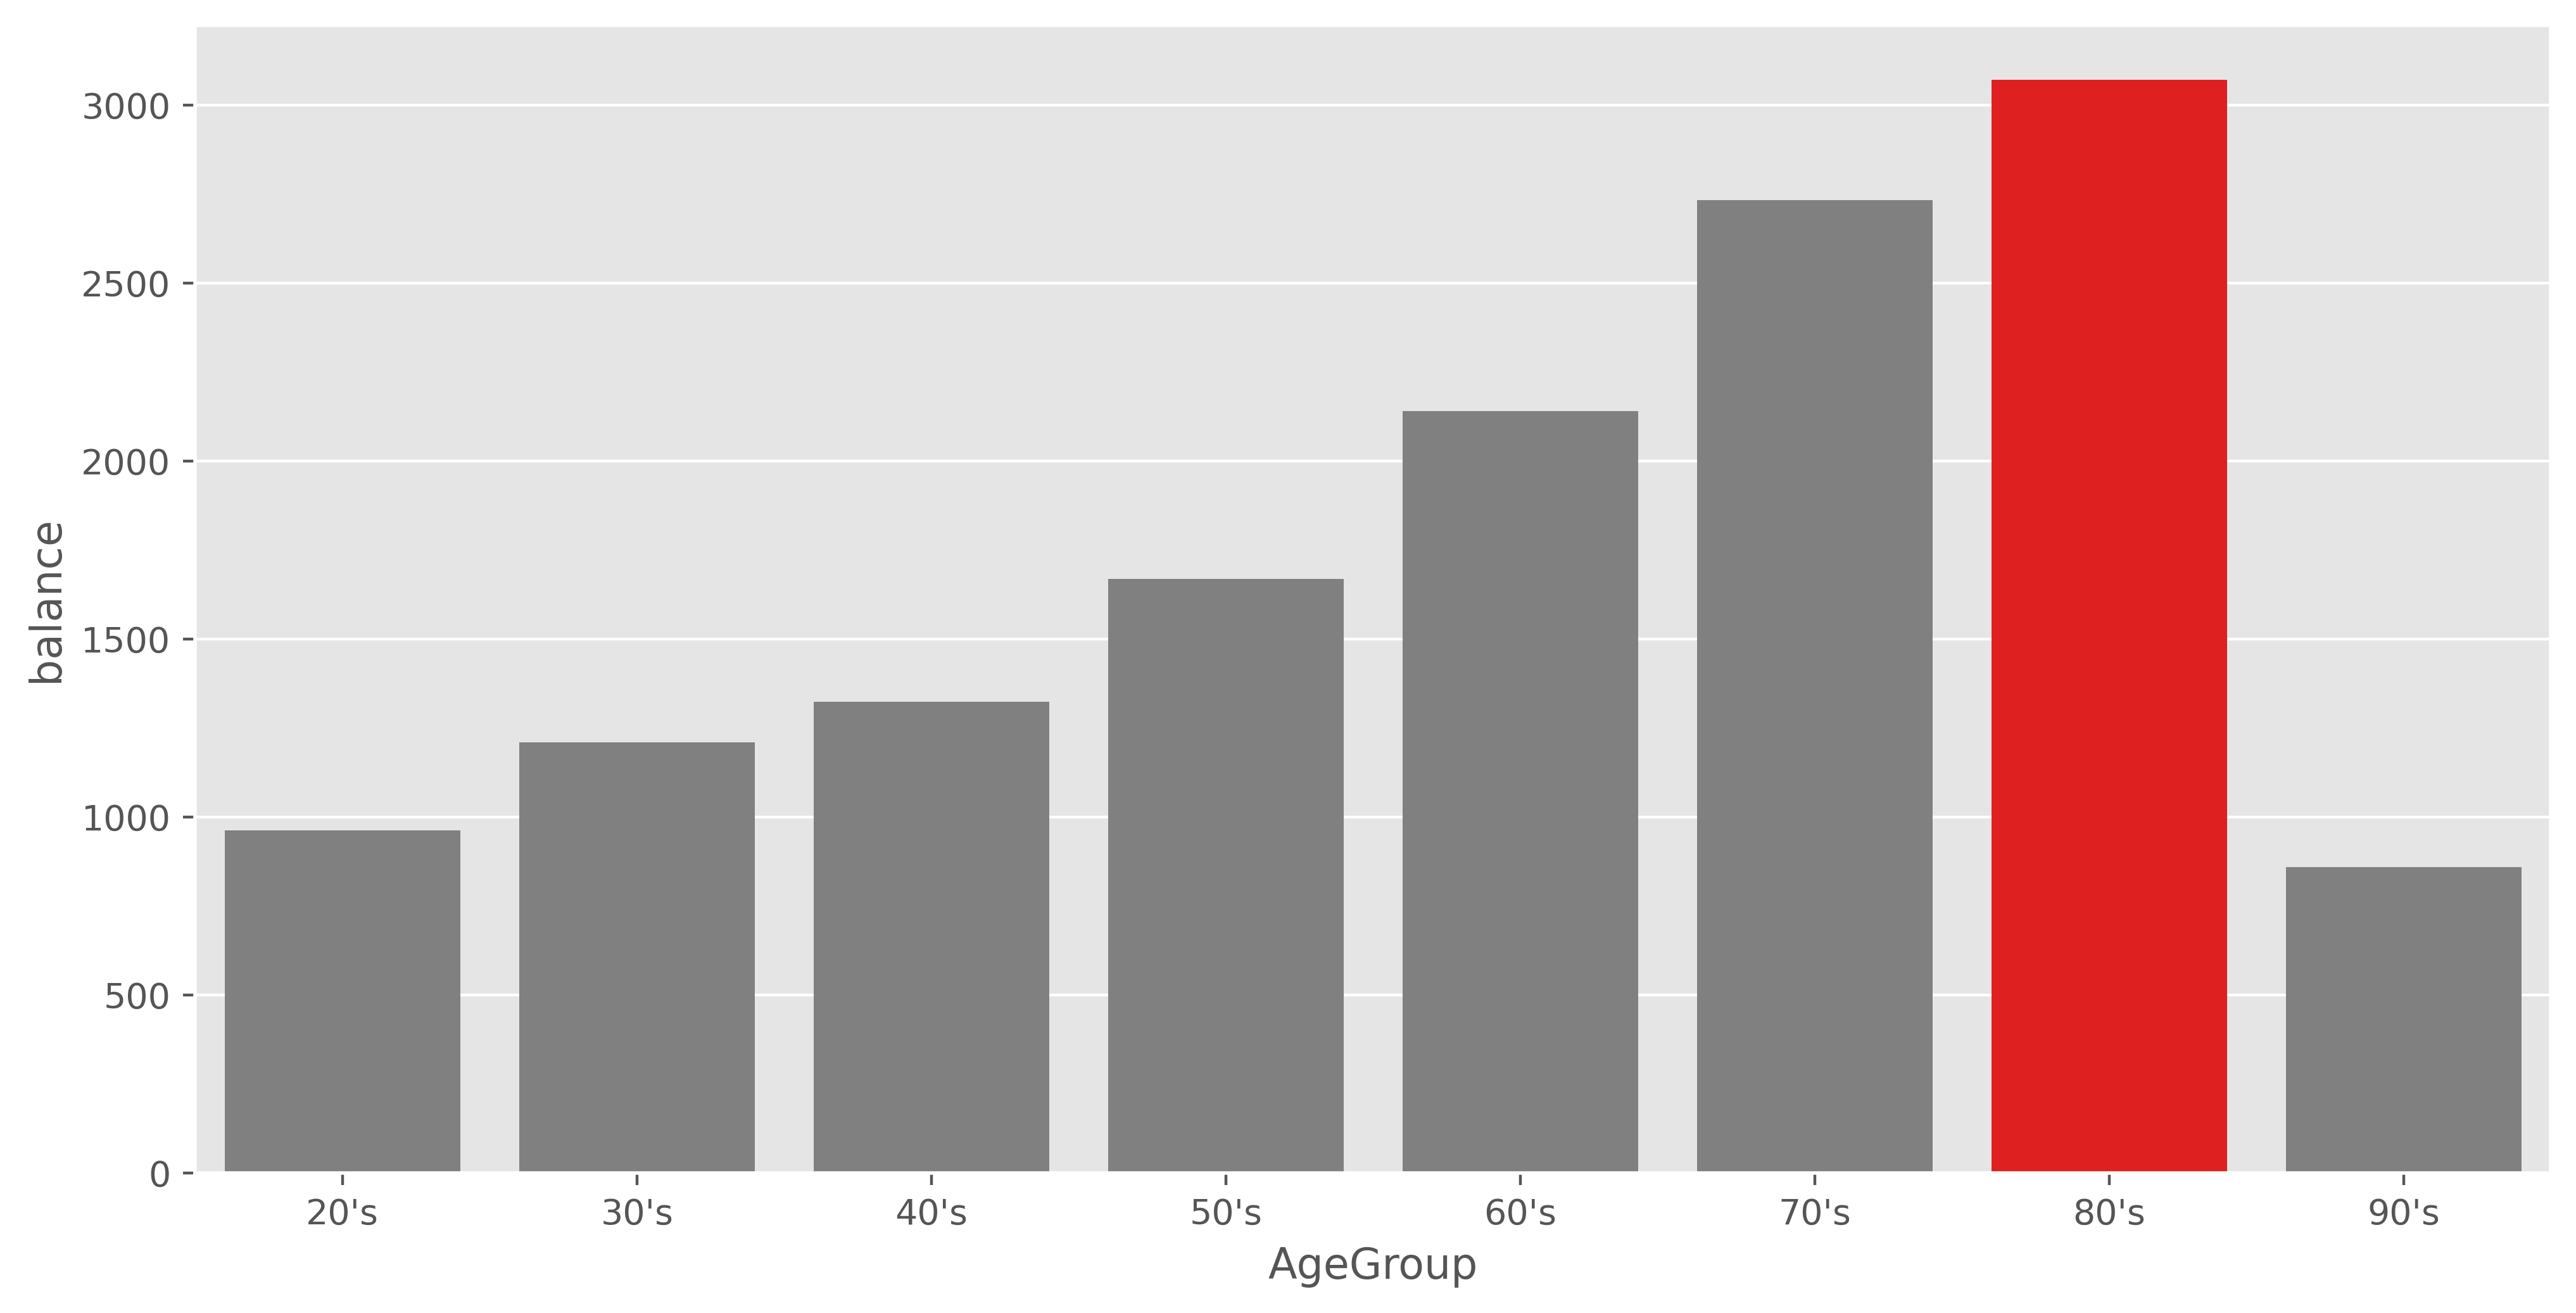

In [ ]:
#--bar plot COLONNA ROSSA del credito medio per range di età---

dfbalance = df[['balance','age']]
bins= [18,30,40,50,60,70,80,90,100]
labels = ["20's","30's","40's","50's","60's","70's","80's","90's"] 
dfbalance['AgeGroup'] = pd. cut(dfbalance['age'], bins=bins, labels=labels, right=False)
dfbalance = dfbalance[['balance','AgeGroup']].groupby(['AgeGroup']).mean()
clrs = ['grey' if (x < max(dfbalance['balance'])) else 'red' for x in dfbalance['balance'] ]
sns.barplot(x=dfbalance.index, y=dfbalance['balance'], palette=clrs)

#-----------------------------------------------------------

In [ ]:
#---Analisi stipendio medio per lavoro-----------------------

dfworkline = df[['job','balance']]
dfworkline = dfworkline.groupby(['job']).mean()
dfworkline.sort_values(by='balance')
clrs = ['grey' if (x < max(dfworkline['balance'])) else 'red' for x in dfworkline['balance'] ]
sns.barplot(x=dfworkline.index, y=dfworkline['balance'], palette=clrs)
plt.xticks(rotation=45)

#------------------------------------------------------------